<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>feature selection</a></span></li></ul></div>

In [1]:
#import requests as r
# import re
# from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import time
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.simplefilter('ignore') #ignore the warnings, not the errors

# data

In [2]:
df=pd.read_csv('timesData_exp_1.csv')

In [3]:
cols_to_drop=[]
cols_to_drop.append('total_score')
cols_to_drop.append('income')
#cols_to_drop.append('female_male_ratio')
cols_to_drop.append('year')

df.drop(cols_to_drop, axis=1, inplace=True)

# ? or fillna - i lose 25/818 universities
# df.fillna(df.mean(),inplace=True)

In [4]:
print("Universities will be lost after cleaning: ",str(len(df.university_name.unique()) - len(df.dropna().university_name.unique())))

Universities will be lost after cleaning:  81


In [5]:
#df.dropna(inplace=True)

In [6]:
df.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               9
research                    0
citations                   0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         236
dtype: int64

In [7]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'num_students', 'student_staff_ratio',
       'international_students', 'female_male_ratio'],
      dtype='object')

In [8]:
df.pivot_table(index='university_name', values='teaching', aggfunc='mean')

,teaching
university_name,
AGH University of Science and Technology,14.200000
Aalborg University,21.920000
Aalto University,30.080000
Aarhus University,33.833333
Aberystwyth University,21.040000
...,...
École Normale Supérieure,59.816667
École Normale Supérieure de Lyon,40.666667
École Polytechnique,52.516667


# feature selection

In [9]:
df1=df.fillna(df.mean())

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

y=df1.female_male_ratio
X=df1[['teaching', 'international', 'research', 'citations', 'num_students', 'student_staff_ratio', 'international_students']]

selector=SelectKBest(f_regression, k=3)

selection=selector.fit_transform(X,y)

pd.DataFrame(selection).head()

,0,1,2
0,99.7,72.4,20152.0
1,97.7,54.6,2243.0
2,97.8,82.3,11074.0
3,98.3,29.5,15596.0
4,90.9,70.3,7929.0


# Pycaret

In [11]:
from pycaret.classification import *

In [12]:
data=df.drop(['world_rank','university_name','country'], axis=1)

In [13]:
exp_clf101 = setup(data = data, target = 'female_male_ratio', session_id=123)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:09:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:09:47
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
teaching,Numeric
international,Numeric
research,Numeric
citations,Numeric
num_students,Numeric
student_staff_ratio,Numeric
international_students,Numeric
female_male_ratio,Label


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:09:47
Status,. . . . . . . . . . . . . . . . . .,Splitting Data
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [0]:
best=compare_models()

In [0]:
plot_model(best, plot='auc')

# Pycaret regression

In [16]:
from pycaret.regression import *
exp_clf101 = setup(data = data, target = 'female_male_ratio', session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2603, 8)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,4.1572,44.9037,6.6724,0.6144,0.1735,0.1263,0.3638
1,Extreme Gradient Boosting,4.1627,45.5696,6.7090,0.6088,0.1712,0.1230,0.2152
2,CatBoost Regressor,4.3556,46.2987,6.7622,0.6037,0.1710,0.1236,6.3068
3,Random Forest,4.3959,47.2638,6.8465,0.5934,0.1776,0.1324,1.0307
4,Light Gradient Boosting Machine,4.5316,48.7046,6.9410,0.5818,0.1761,0.1323,0.1232
5,Gradient Boosting Regressor,5.7071,64.3319,7.9915,0.4476,0.2042,0.1624,0.3255
6,K Neighbors Regressor,5.3840,68.3151,8.1797,0.4194,0.2083,0.1642,0.0038
7,Decision Tree,4.6519,81.8213,9.0154,0.2893,0.2208,0.1295,0.0254
8,Bayesian Ridge,7.0561,93.4919,9.6393,0.1952,0.2485,0.2117,0.0435
9,Linear Regression,7.0598,93.5051,9.6398,0.1951,0.2484,0.2116,0.0211


In [18]:
model=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.3660,50.5212,7.1078,0.6012,0.1832,0.1183
1,3.6677,38.9040,6.2373,0.6194,0.1507,0.0904
2,4.3690,53.5196,7.3157,0.5777,0.1921,0.1197
3,4.6417,52.8413,7.2692,0.5625,0.1902,0.1245
4,3.8292,36.5138,6.0427,0.6315,0.1625,0.1048
5,4.2448,37.6202,6.1335,0.6821,0.1414,0.0995
6,4.0584,39.3277,6.2712,0.6413,0.1401,0.0944
7,4.5640,56.6125,7.5241,0.5599,0.2894,0.3309
8,4.0868,50.5221,7.1079,0.6244,0.1467,0.0908
9,3.7444,32.6547,5.7144,0.6445,0.1382,0.0899


In [19]:
tuned_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1184,61.0510,7.8135,0.5181,0.2032,0.1409
1,4.2396,41.6054,6.4502,0.5930,0.1582,0.1043
2,5.0322,59.3324,7.7028,0.5318,0.1988,0.1343
3,5.0448,57.3481,7.5729,0.5252,0.2025,0.1383
4,4.3024,43.2996,6.5802,0.5630,0.1795,0.1204
5,5.0435,48.6852,6.9775,0.5886,0.1661,0.1223
6,4.7663,46.9650,6.8531,0.5716,0.1581,0.1136
7,5.1996,63.8404,7.9900,0.5037,0.3004,0.3546
8,4.6053,55.0029,7.4164,0.5911,0.1624,0.1073
9,4.2864,37.4710,6.1214,0.5921,0.1494,0.1040


In [22]:
model.feature_importances_

array([0.10263535, 0.17045509, 0.09883022, 0.13578737, 0.19773935,
       0.15328027, 0.14127235])

columns to series or list and then barchart 
pycaret feature selection in setup - drops unimportant features

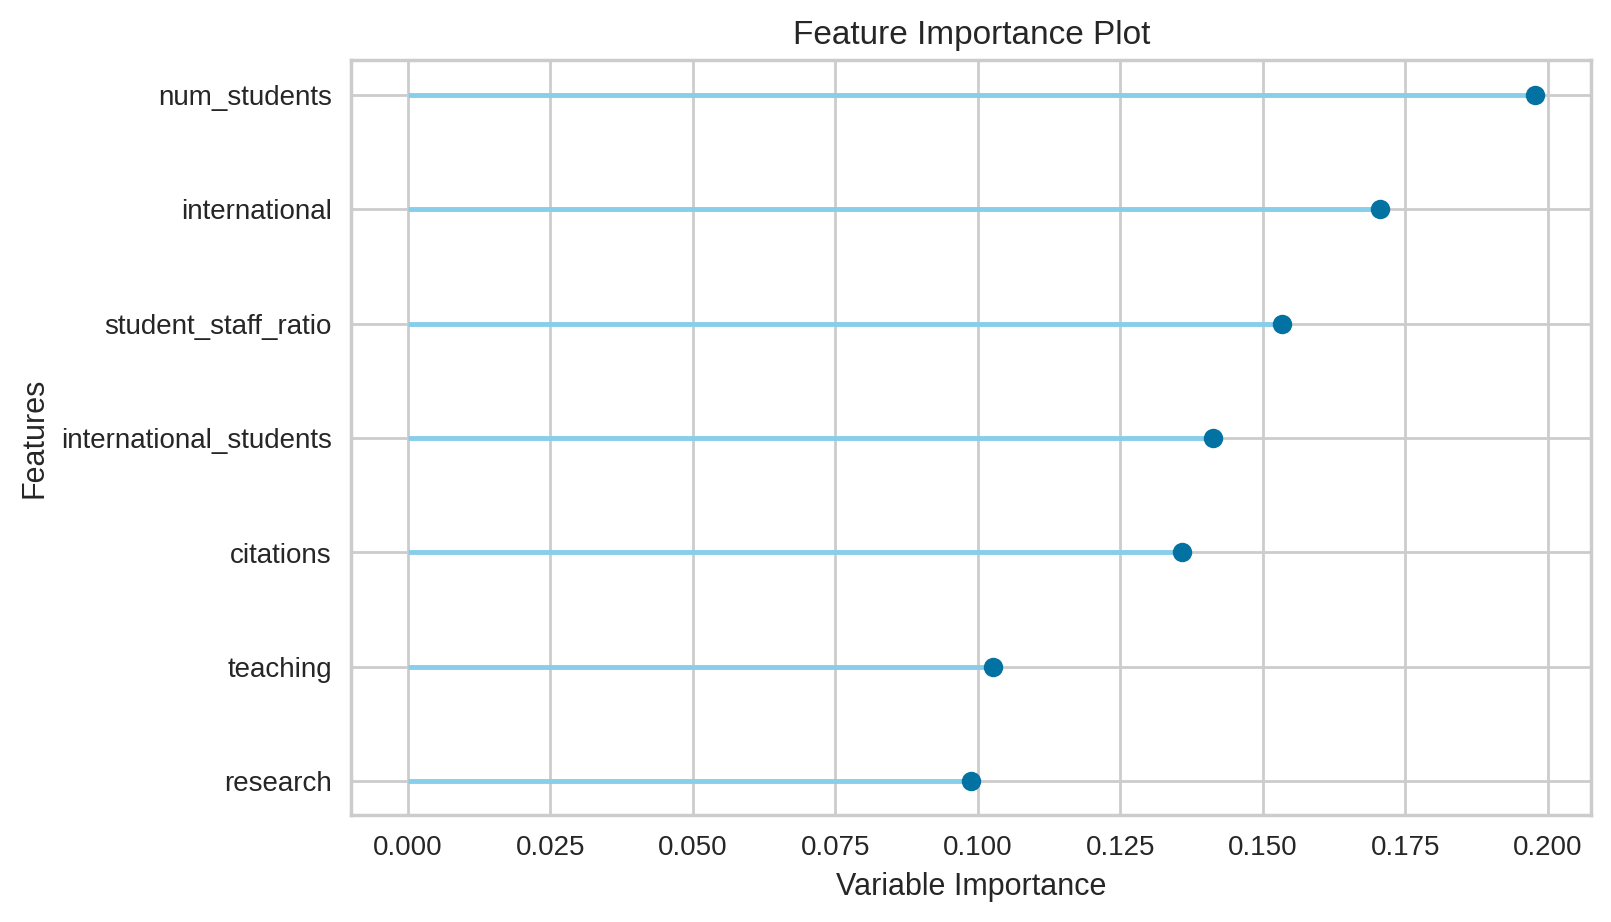

In [28]:
plot_model(model, 'feature')

In [29]:
# interpret_model(model) 
# doesnt work

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pycaret/regression.py", line 7747, in interpret_model
    import shap
ModuleNotFoundError: No module named 'shap'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-b1104e8b9bd7>", line 1, in <module>
    interpret_model(model)
  File "/usr/local/lib/python3.8/dist-packages/pycaret/regression.py", line 7750, in interpret_model
    sys.exit("shap library not found. pip install shap to use interpret_model function.")
SystemExit: shap library not found. pip install shap to use interpret_model function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.p

TypeError: object of type 'NoneType' has no len()

In [0]:
# R2 is 0.61

# Pycaret regression after feature selection

In [39]:
import warnings
warnings.simplefilter('ignore') #ignore the warnings, not the errors

In [34]:
data_fs=data.drop(['teaching','research'], axis=1)

In [35]:
from pycaret.regression import *
exp_clf321 = setup(data = data_fs, target = 'female_male_ratio', session_id=321)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,321
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2603, 6)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0


INFO:logs:master_model_container: 0


INFO:logs:display_container: 0


INFO:logs:setup() succesfully completed......................................


In [36]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,4.1598,42.1841,6.4654,0.6428,0.1631,0.1202,5.4059
1,Extra Trees Regressor,3.8552,43.1174,6.5241,0.6370,0.1673,0.1171,0.3405
2,Extreme Gradient Boosting,3.7204,43.2548,6.5470,0.6330,0.1653,0.1110,0.1738
3,Random Forest,4.0847,44.3774,6.6306,0.6231,0.1679,0.1199,0.8174
4,Light Gradient Boosting Machine,4.4488,47.8013,6.8871,0.5943,0.1723,0.1285,0.1151
5,Gradient Boosting Regressor,5.8571,67.8975,8.2255,0.4164,0.2097,0.1671,0.2812
6,K Neighbors Regressor,5.6108,69.6262,8.3124,0.4006,0.2106,0.1695,0.0070
7,Decision Tree,4.2583,80.7872,8.9227,0.3059,0.2320,0.1200,0.0213
8,Linear Regression,7.4370,103.2120,10.1269,0.1242,0.2579,0.2219,0.0131
9,Ridge Regression,7.4370,103.2120,10.1269,0.1242,0.2579,0.2219,0.0200


INFO:logs:create_model_container: 1


INFO:logs:master_model_container: 1


INFO:logs:display_container: 2


INFO:logs:<catboost.core.CatBoostRegressor object at 0x7fbf307857f0>


INFO:logs:compare_models() succesfully completed......................................


In [37]:
model=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.9979,36.4976,6.0413,0.6550,0.1360,0.0906
1,4.9375,52.4730,7.2438,0.5750,0.1774,0.1252
2,3.8431,37.9991,6.1643,0.6922,0.1546,0.0998
3,4.1253,37.0183,6.0843,0.6282,0.1603,0.1058
4,4.4653,46.5506,6.8228,0.6325,0.1660,0.1108
5,3.5185,31.4337,5.6066,0.6749,0.1218,0.0800
6,4.5174,56.9013,7.5433,0.6076,0.2947,0.3098
7,3.8299,32.1663,5.6715,0.6634,0.1357,0.0913
8,4.3777,45.7808,6.7662,0.6605,0.1469,0.0987
9,3.9855,45.0205,6.7097,0.6392,0.1379,0.0898


INFO:logs:create_model_container: 2


INFO:logs:master_model_container: 2


INFO:logs:display_container: 3


INFO:logs:<catboost.core.CatBoostRegressor object at 0x7fbf30876670>


INFO:logs:create_model() succesfully completed......................................


In [38]:
tuned_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7759,34.5483,5.8778,0.6734,0.1355,0.0866
1,4.8359,50.4899,7.1056,0.5911,0.1746,0.1239
2,3.9670,42.9943,6.5570,0.6517,0.1679,0.1068
3,4.0967,36.1175,6.0098,0.6372,0.1487,0.0995
4,4.3757,49.8939,7.0636,0.6061,0.1688,0.1060
5,3.6322,29.8287,5.4616,0.6915,0.1203,0.0829
6,4.7046,66.4838,8.1538,0.5416,0.3063,0.3270
7,3.8750,35.3522,5.9458,0.6300,0.1415,0.0930
8,4.2109,44.0740,6.6388,0.6731,0.1435,0.0939
9,3.7370,43.8338,6.6207,0.6487,0.1378,0.0846


INFO:logs:create_model_container: 3


INFO:logs:master_model_container: 3


INFO:logs:display_container: 4


INFO:logs:<catboost.core.CatBoostRegressor object at 0x7fbf311fe5b0>


INFO:logs:tune_model() succesfully completed......................................


In [40]:
# interpret_model(model)
# doesnt work as usual

INFO:logs:Initializing interpret_model()


INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x7fbf30876670>, plot=summary, feature=None, observation=None)


INFO:logs:Checking exceptions


ERROR:logs:shap library not found. pip install shap to use interpret_model function.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pycaret/regression.py", line 7747, in interpret_model
    import shap
ModuleNotFoundError: No module named 'shap'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-b1104e8b9bd7>", line 1, in <module>
    interpret_model(model)
  File "/usr/local/lib/python3.8/dist-packages/pycaret/regression.py", line 7750, in interpret_model
    sys.exit("shap library not found. pip install shap to use interpret_model function.")
SystemExit: shap library not found. pip install shap to use interpret_model function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.p

TypeError: object of type 'NoneType' has no len()

In [41]:
plot_model(model, 'feature')

INFO:logs:Initializing plot_model()


INFO:logs:plot_model(estimator=<catboost.core.CatBoostRegressor object at 0x7fbf30876670>, plot=feature, save=False, verbose=True, system=True)


INFO:logs:Checking exceptions


SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

In [0]:
# no idea how to plot it 